امتحان میان ترم

مرجان سهرابی
4021690091



*  ابتدا پکیج‌های مورد نظر را فراخوانی میکنیم

In [113]:
#import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [69]:
!git clone https://github.com/M-Arashi/DataMining-Python.git
%cd DataMining-Python

Cloning into 'DataMining-Python'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 91 (delta 15), reused 0 (delta 0), pack-reused 52
Receiving objects: 100% (91/91), 4.79 MiB | 18.37 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/DataMining-Python/DataMining-Python/DataMining-Python/DataMining-Python




1.   داده‌ها را فراخوانی می‌کنیم



In [70]:
#import data from github
data = pd.read_csv('star-dataset.csv')
print(data.shape)

(240, 7)


In [71]:
#check the first 5 rows of data
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [72]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [73]:
#check for null data
data.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [74]:
print(data.dtypes)

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object


In [106]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'White-Yellow', 'Pale yellow orange',
       'Blue', 'Whitish', 'Orange', 'Yellowish', 'Orange-Red'],
      dtype=object)

In [105]:
data.replace("Blue white", 'Blue White', inplace=True)
data.replace('Blue white ', 'Blue White', inplace=True)
data.replace('Blue-white','Blue White', inplace=True)
data.replace('Blue-White','Blue White', inplace=True)
data.replace('Blue ','Blue', inplace=True)
data.replace('white','White', inplace=True)
data.replace('yellowish','Yellowish', inplace=True)
data.replace('yellow-white','White-Yellow', inplace=True)
data.replace('Yellowish White','White-Yellow', inplace=True)


داده‌ها دارای مقادیر گمشده نیستند بنابراین برای مدل سازی آماده اند.



2. رسم نمودار دایره ای برای نوع ستاره ها

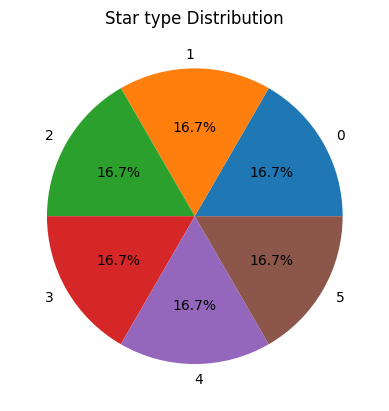

In [44]:
#pie plot for type of stars
import matplotlib.pyplot as plt

# Count the number of diabetic and non-diabetic individuals
outcome_counts = data['Star type'].value_counts()

# Plotting the pie plot
#plt.figure(figsize=(6, 6))
plt.pie(outcome_counts,labels=['0', '1','2','3','4','5'], autopct='%1.1f%%')
plt.title('Star type Distribution')
plt.show()

3- تغییرات دمای کوتوله‌های قرمز

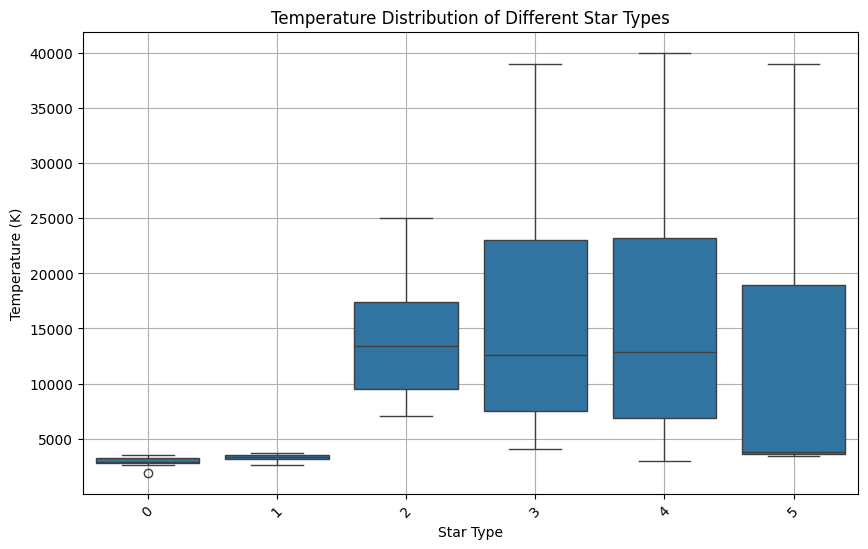

In [48]:
# box plot for Temperature and Star type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Temperature (K)', data=data)
plt.title('Temperature Distribution of Different Star Types')
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Temperature interval for red stars: 2621 - 3692


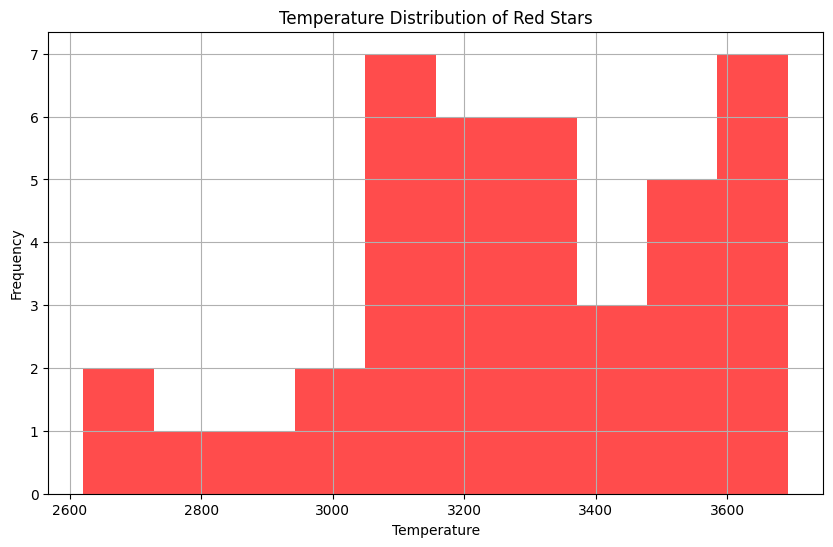

2621 3692


In [50]:

# Filter the dataset to only include red stars
red_stars = data[data['Star type'] == 1]

# Calculate temperature interval for red stars
min_temp = red_stars['Temperature (K)'].min()
max_temp = red_stars['Temperature (K)'].max()

print("Temperature interval for red stars:", min_temp, "-", max_temp)

# Plot the temperature distribution of red stars
plt.figure(figsize=(10, 6))
plt.hist(red_stars['Temperature (K)'], bins=10, color='red', alpha=0.7)
plt.title('Temperature Distribution of Red Stars')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(min_temp,max_temp)

5- ماتریس feature و ستون target

In [109]:
X = data.drop(columns=["Star type"])
y = data["Star type"]
#features
print(X)
#target
print(y)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

    Star color Spectral Class  
0      

4- تقسیم داده ها به 3 دسته

In [230]:
label_encoder = LabelEncoder()

# Fit label encoder and transform star_colors
X["Star color"] = label_encoder.fit_transform(data["Star color"])
X["Spectral Class"] = label_encoder.fit_transform(data["Spectral Class"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=5, shuffle=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [251]:
X["Star color"] = label_encoder.fit_transform(data["Star color"])
print("Color to numerical value mapping:")
for color, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{color}: {numerical_value}")

Color to numerical value mapping:
Blue: 0
Blue White: 1
Orange: 2
Orange-Red: 3
Pale yellow orange: 4
Red: 5
White: 6
White-Yellow: 7
Whitish: 8
Yellowish: 9


In [252]:
X["Spectral Class"] = label_encoder.fit_transform(data["Spectral Class"])
print("Color to numerical value mapping:")
for color, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{color}: {numerical_value}")

Color to numerical value mapping:
A: 0
B: 1
F: 2
G: 3
K: 4
M: 5
O: 6


6,7,8- درخت تصمیم و جنگل تصادفی

In [231]:
# Fit the decision tree model
model1= DecisionTreeClassifier(criterion= 'entropy' , random_state=42 ,max_depth=3)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print('y_pred:' , y_pred1)

y_pred: [1 2 3 5 1 5 5 3 1 0 2 1 2 0 5 4 2 2 0 4 3 2 5 4 2 5 4 1 1 2 3 1 4 5 2 3]


In [232]:
conf_mat=metrics.confusion_matrix (y_test , y_pred1)
print('Confusion Matrix:', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test , y_pred1)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score*100), '%')

Confusion Matrix: [[3 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 7]]
Accuracy Score: 1.0
Accuracy in Percentage: 100 %


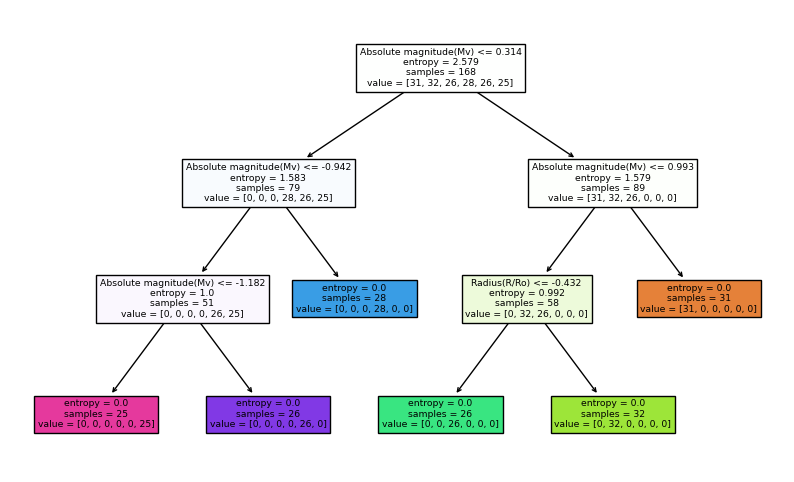

Feature Importances:
[0.         0.         0.13285071 0.86714929 0.         0.        ]


In [233]:
from sklearn.tree import plot_tree
# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(model1, feature_names=X.columns, filled=True)
plt.show()

# Interpret the decision tree structure
# You can interpret the tree structure manually or using feature importance attributes
print("Feature Importances:")
print(model1.feature_importances_)

<Axes: xlabel='Predicted', ylabel='Actual'>

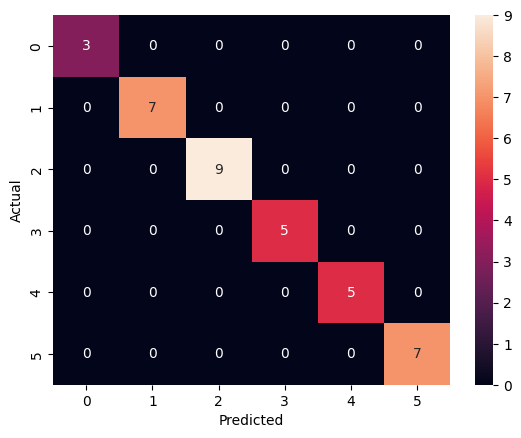

In [234]:
conf_mat=pd.crosstab(y_test , y_pred1 , rownames= [ 'Actual' ], colnames= [ 'Predicted' ])
sn.heatmap(conf_mat , annot=True)

In [237]:
# Hyperparameter tuning (example: max depth)
best_accuracy = 0
best_max_depth = None
for max_depth in range(1, 11):
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_val_pred = dt_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

# Evaluate performance on test set with the best hyperparameters
final_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_dt_model.fit(X_train, y_train)
y_test_pred = final_dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.8055555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

In [238]:
conf_mat=metrics.confusion_matrix (y_test , y_test_pred)
print('Confusion Matrix:', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test , y_test_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score*100), '%')

Confusion Matrix: [[3 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 7 0]]
Accuracy Score: 0.8055555555555556
Accuracy in Percentage: 80 %


<Axes: xlabel='Predicted', ylabel='Actual'>

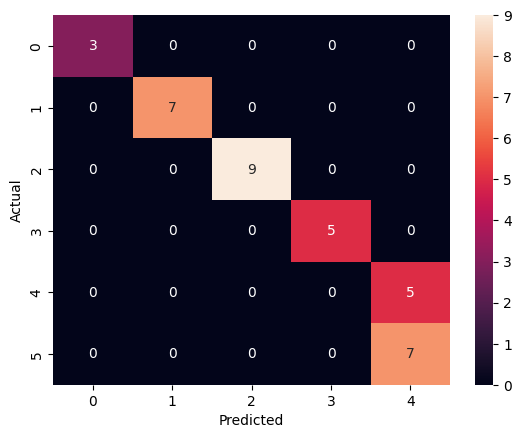

In [239]:
conf_mat=pd.crosstab(y_test , y_test_pred , rownames= [ 'Actual' ], colnames= [ 'Predicted' ])
sn.heatmap(conf_mat , annot=True)

7- جنگل تصادفی

In [244]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Fitting Random Forest Regression to the dataset
model2 = RandomForestClassifier(n_estimators=100, random_state=5, oob_score=False)

# Fit the regressor with x and y data
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print('y_pred:' , y_pred2)

y_pred: [1 2 3 5 1 5 5 3 1 0 2 1 2 0 5 4 2 2 0 4 3 2 5 4 2 5 4 1 1 2 3 1 4 5 2 3]


In [245]:
conf_mat=metrics.confusion_matrix (y_test , y_pred2)
print('Confusion Matrix:', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test , y_pred2)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score*100), '%')

Confusion Matrix: [[3 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 7]]
Accuracy Score: 1.0
Accuracy in Percentage: 100 %


<Axes: xlabel='Predicted', ylabel='Actual'>

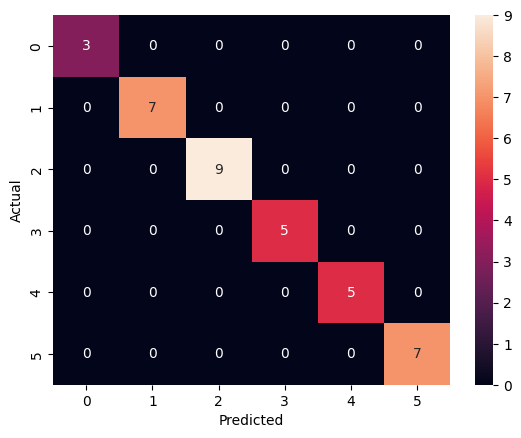

In [249]:
conf_mat=pd.crosstab(y_test , y_pred2 , rownames= [ 'Actual' ], colnames= [ 'Predicted' ])
sn.heatmap(conf_mat , annot=True)

In [247]:
# Hyperparameter tuning (example: number of trees and max depth)
best_accuracy = 0
best_n_estimators = None
best_max_depth = None
for n_estimators in [50, 100, 150]:  # Example values for number of trees
    for max_depth in [5, 10, 15]:  # Example values for max depth
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        y_val_pred = rf_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Evaluate performance on test set with the best hyperparameters
final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
final_rf_model.fit(X_train, y_train)
y_test_pred = final_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without

Test set accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [248]:
conf_mat=metrics.confusion_matrix (y_test , y_test_pred)
print('Confusion Matrix:', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test , y_test_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score*100), '%')

Confusion Matrix: [[3 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 7]]
Accuracy Score: 1.0
Accuracy in Percentage: 100 %


9- پیش بینی مقدار جدید

In [254]:
print(X.columns)

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color', 'Spectral Class'],
      dtype='object')


In [255]:
#defining new record
new_data= pd.DataFrame([[3672,0.000023,0.12,10.11,5 , 5]])
new_data.columns=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
new_data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3672,0.000023,0.12,10.11,5,5


In [256]:
#prediction by Decision Tree
tree_predictions = final_dt_model.predict(new_data)
print("Predictions using Decision Tree Model:", tree_predictions)

Predictions using Decision Tree Model: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [257]:
#prediction by Logistic Regression
logistic_predictions = model2.predict(new_data)
print("Predictions using Logistic Regression Model:", logistic_predictions)

Predictions using Logistic Regression Model: [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
